<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-07 12:02:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  65.5MB/s    in 3.1s    

2025-09-07 12:02:28 (65.5 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 143.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 219.1 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 160.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 168.4 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [10]:
# Mostrar las tablas disponibles en la base de datos
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)
print(tables)



   name
0  main


In [11]:
# Ver las primeras filas de la tabla 'main' para identificar las columnas
df_preview = pd.read_sql_query("SELECT * FROM main LIMIT 5;", conn)
print(df_preview.columns)


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


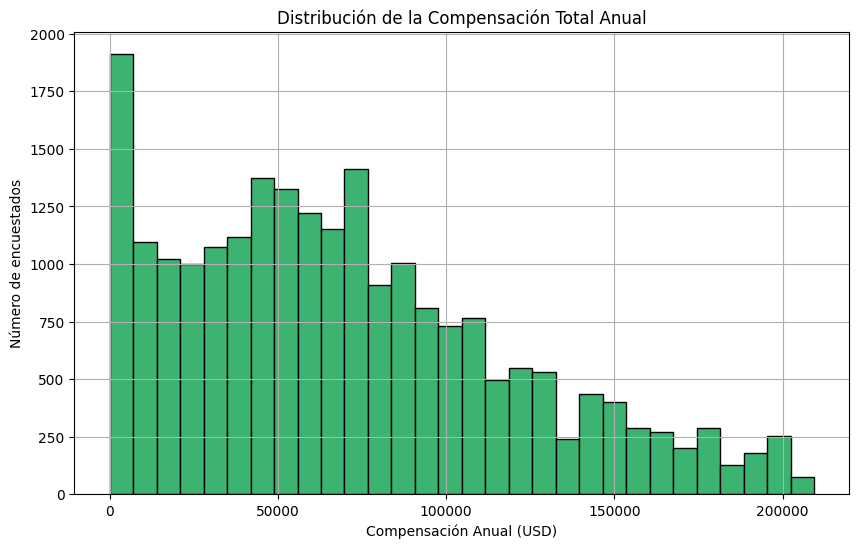

In [12]:
# Extraer los datos de compensación total anual
query = "SELECT ConvertedCompYearly FROM main"
df = pd.read_sql_query(query, conn)

# Eliminar valores nulos y filtrar valores extremos para una mejor visualización
df = df.dropna()
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.95)]

# Graficar el histograma
plt.figure(figsize=(10,6))
plt.hist(df['ConvertedCompYearly'], bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Distribución de la Compensación Total Anual')
plt.xlabel('Compensación Anual (USD)')
plt.ylabel('Número de encuestados')
plt.grid(True)
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


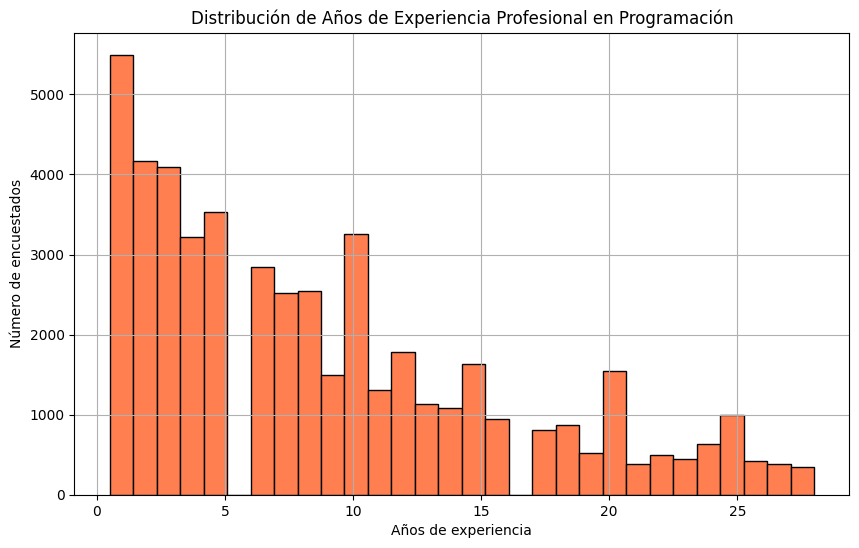

In [13]:
# Extraer los datos de YearsCodePro desde la tabla 'main'
query = "SELECT YearsCodePro FROM main"
df = pd.read_sql_query(query, conn)

# Eliminar valores nulos
df = df.dropna()

# Convertir valores a numéricos (algunos pueden ser texto como 'Less than 1 year')
def clean_experience(val):
    if isinstance(val, str):
        if 'Less than' in val:
            return 0.5
        elif 'More than' in val:
            return 50  # Asignamos un valor alto arbitrario
        else:
            try:
                return float(val)
            except:
                return None
    return val

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
df = df.dropna()

# Filtrar valores extremos para una mejor visualización
df = df[df['YearsCodePro'] < df['YearsCodePro'].quantile(0.95)]

# Graficar el histograma
plt.figure(figsize=(10,6))
plt.hist(df['YearsCodePro'], bins=30, color='coral', edgecolor='black')
plt.title('Distribución de Años de Experiencia Profesional en Programación')
plt.xlabel('Años de experiencia')
plt.ylabel('Número de encuestados')
plt.grid(True)
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [14]:
# Extraer la columna Age
query = "SELECT Age FROM main"
df_age = pd.read_sql_query(query, conn)

# Eliminar valores nulos
df_age = df_age.dropna()

# Mostrar los valores únicos ordenados
valores_unicos = sorted(df_age['Age'].unique())
print(valores_unicos)


['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say', 'Under 18 years old']


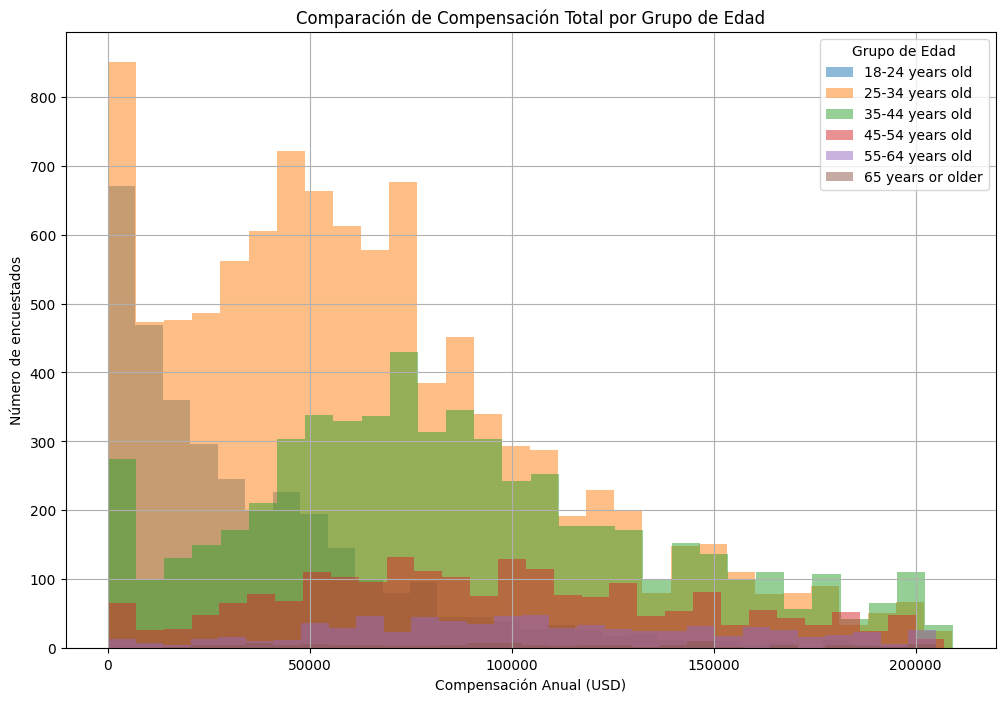

In [15]:
# Extraer las columnas necesarias
query = "SELECT Age, ConvertedCompYearly FROM main"
df = pd.read_sql_query(query, conn)

# Eliminar valores nulos
df = df.dropna()

# Filtrar valores extremos de compensación para evitar distorsión
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.95)]

# Filtrar grupos válidos de edad (excluyendo 'Prefer not to say' y 'Under 18 years old')
grupos_validos = [
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
df = df[df['Age'].isin(grupos_validos)]

# Graficar histogramas por grupo de edad
plt.figure(figsize=(12,8))

for grupo in grupos_validos:
    subset = df[df['Age'] == grupo]
    plt.hist(subset['ConvertedCompYearly'], bins=30, alpha=0.5, label=grupo)

plt.title('Comparación de Compensación Total por Grupo de Edad')
plt.xlabel('Compensación Anual (USD)')
plt.ylabel('Número de encuestados')
plt.legend(title='Grupo de Edad')
plt.grid(True)
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [17]:
# Ver cuántos valores no nulos hay en TimeSearching
query = "SELECT TimeSearching FROM main"
df = pd.read_sql_query(query, conn)
print(df['TimeSearching'].notna().sum())


28911


In [18]:
# Extraer la columna TimeSearching
query = "SELECT TimeSearching FROM main"
df = pd.read_sql_query(query, conn)

# Eliminar valores nulos
df = df.dropna()

# Mostrar los valores únicos ordenados
valores_unicos = sorted(df['TimeSearching'].unique())
print(valores_unicos)


['15-30 minutes a day', '30-60 minutes a day', '60-120 minutes a day', 'Less than 15 minutes a day', 'Over 120 minutes a day']


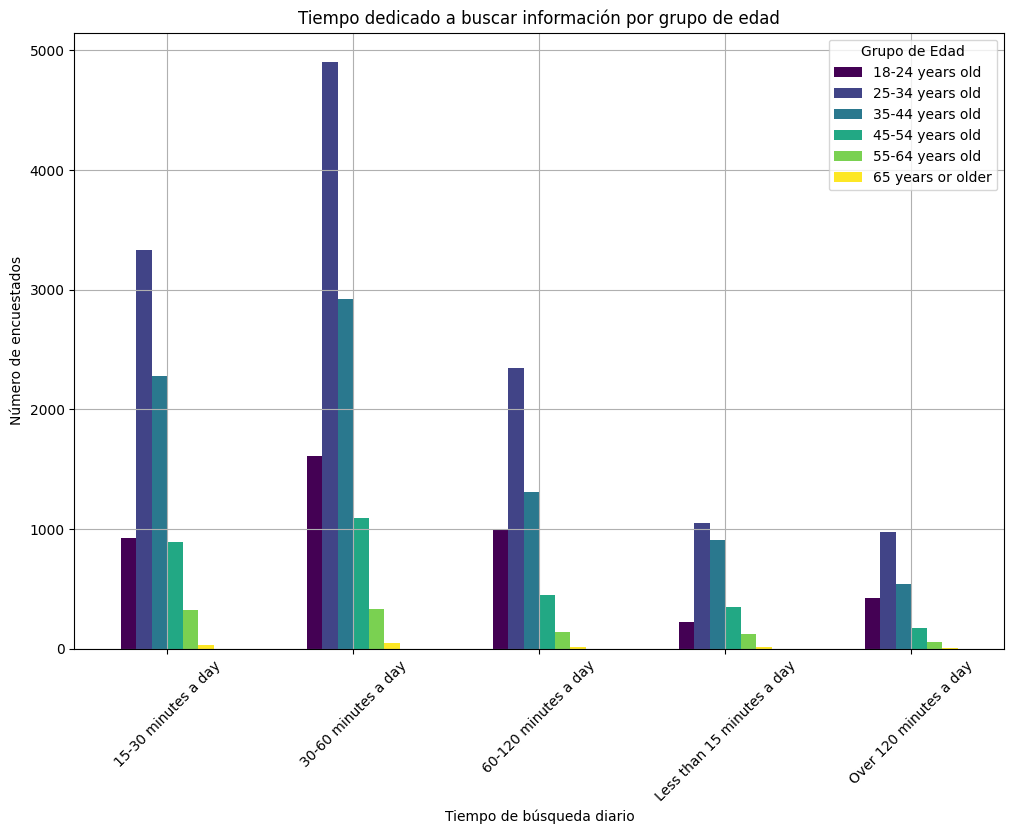

In [19]:
# Extraer las columnas necesarias
query = "SELECT Age, TimeSearching FROM main"
df = pd.read_sql_query(query, conn)
df = df.dropna()

# Filtrar grupos válidos de edad
grupos_edad = [
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
df = df[df['Age'].isin(grupos_edad)]

# Filtrar categorías válidas de TimeSearching
categorias_tiempo = [
    'Less than 15 minutes a day',
    '15-30 minutes a day',
    '30-60 minutes a day',
    '60-120 minutes a day',
    'Over 120 minutes a day'
]
df = df[df['TimeSearching'].isin(categorias_tiempo)]

# Crear tabla de frecuencias cruzadas
tabla = pd.crosstab(df['TimeSearching'], df['Age'])

# Graficar
tabla.plot(kind='bar', figsize=(12,8), colormap='viridis')
plt.title('Tiempo dedicado a buscar información por grupo de edad')
plt.xlabel('Tiempo de búsqueda diario')
plt.ylabel('Número de encuestados')
plt.legend(title='Grupo de Edad')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


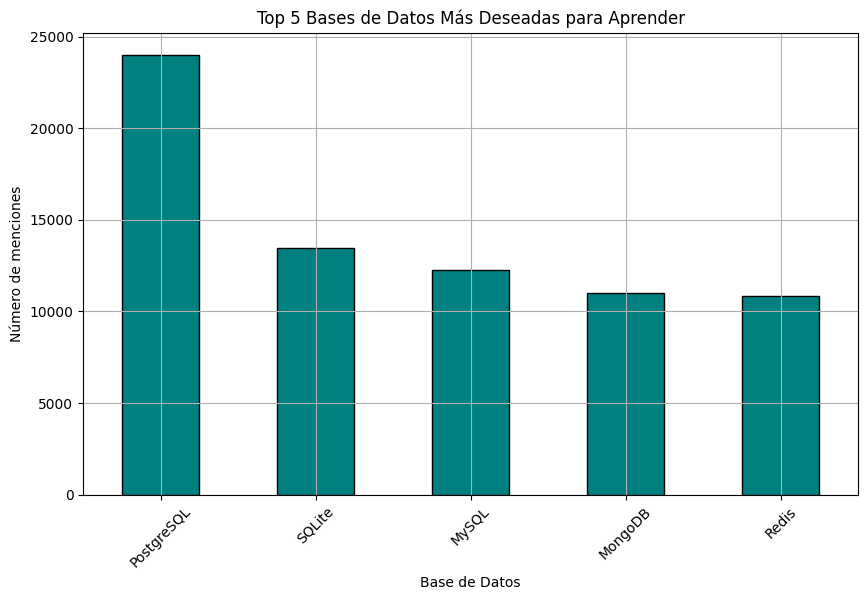

In [20]:
# Extraer la columna DatabaseWantToWorkWith
query = "SELECT DatabaseWantToWorkWith FROM main"
df = pd.read_sql_query(query, conn)
df = df.dropna()

# Separar múltiples respuestas (asumiendo que están separadas por ';')
db_series = df['DatabaseWantToWorkWith'].str.split(';').explode()

# Contar frecuencia de cada base de datos
conteo_db = db_series.value_counts().head(5)

# Graficar el histograma (gráfico de barras)
plt.figure(figsize=(10,6))
conteo_db.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Top 5 Bases de Datos Más Deseadas para Aprender')
plt.xlabel('Base de Datos')
plt.ylabel('Número de menciones')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [21]:
# Extraer la columna RemoteWork
query = "SELECT RemoteWork FROM main"
df_remote = pd.read_sql_query(query, conn)

# Eliminar valores nulos
df_remote = df_remote.dropna()

# Mostrar los valores únicos
valores_unicos = df_remote['RemoteWork'].unique()
print(valores_unicos)


['Remote' 'In-person' 'Hybrid (some remote, some in-person)']


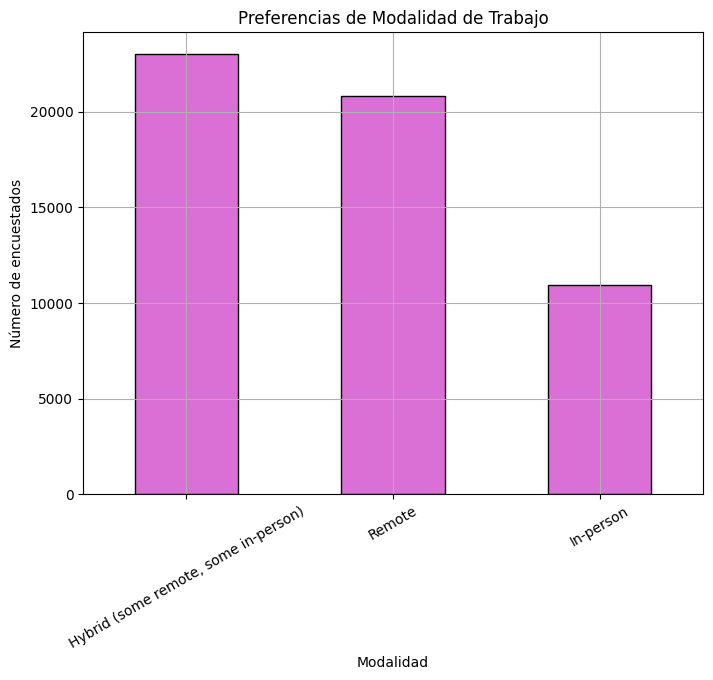

In [22]:
# Extraer la columna RemoteWork
query = "SELECT RemoteWork FROM main"
df_remote = pd.read_sql_query(query, conn)
df_remote = df_remote.dropna()

# Contar frecuencia de cada categoría
conteo_modalidad = df_remote['RemoteWork'].value_counts()

# Graficar
plt.figure(figsize=(8,6))
conteo_modalidad.plot(kind='bar', color='orchid', edgecolor='black')
plt.title('Preferencias de Modalidad de Trabajo')
plt.xlabel('Modalidad')
plt.ylabel('Número de encuestados')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


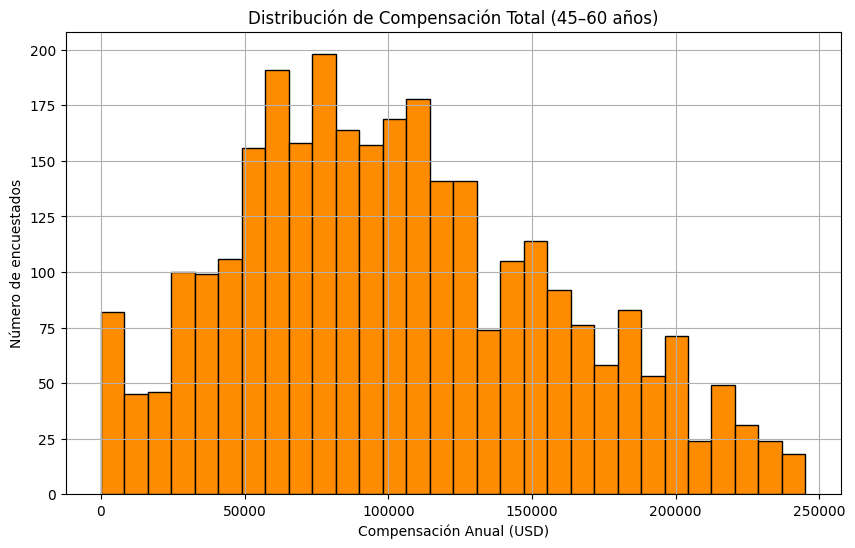

In [23]:
# Extraer las columnas necesarias
query = "SELECT Age, ConvertedCompYearly FROM main"
df = pd.read_sql_query(query, conn)
df = df.dropna()

# Filtrar solo los grupos de edad entre 45 y 60 años
grupos_objetivo = ['45-54 years old', '55-64 years old']
df = df[df['Age'].isin(grupos_objetivo)]

# Filtrar valores extremos de compensación para evitar distorsión
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.95)]

# Graficar el histograma
plt.figure(figsize=(10,6))
plt.hist(df['ConvertedCompYearly'], bins=30, color='darkorange', edgecolor='black')
plt.title('Distribución de Compensación Total (45–60 años)')
plt.xlabel('Compensación Anual (USD)')
plt.ylabel('Número de encuestados')
plt.grid(True)
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [24]:
# Extraer YearsCodePro
query = "SELECT YearsCodePro FROM main"
df_exp = pd.read_sql_query(query, conn)
df_exp = df_exp.dropna()

# Mostrar valores únicos ordenados
valores_experiencia = sorted(df_exp['YearsCodePro'].unique())
print("Valores únicos de YearsCodePro:")
print(valores_experiencia)


Valores únicos de YearsCodePro:
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '6', '7', '8', '9', 'Less than 1 year', 'More than 50 years']


In [25]:
# Extraer JobSat
query = "SELECT JobSat FROM main"
df_sat = pd.read_sql_query(query, conn)
df_sat = df_sat.dropna()

# Mostrar valores únicos
valores_satisfaccion = df_sat['JobSat'].unique()
print("Valores únicos de JobSat:")
print(valores_satisfaccion)


Valores únicos de JobSat:
[ 8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
